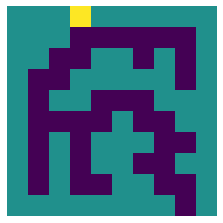

In [7]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

a =[[1,1,1,2,1,1,1,1,1,1],
    [1,1,1,0,0,0,0,0,0,1],
    [1,1,0,0,1,1,0,1,0,1],
    [1,0,0,1,1,1,1,1,0,1],  
    [1,0,1,1,0,0,0,1,1,1],    
    [1,0,0,0,0,1,0,0,1,1],  
    [1,0,1,0,1,1,1,0,0,1],
    [1,0,1,0,1,1,0,0,1,1],
    [1,0,1,0,0,1,1,0,0,1],
    [1,1,1,1,1,1,1,1,0,1]]

b =[[1,1,1,0,1,1,1,1,1,1],
    [1,1,1,2,0,0,0,0,0,1],
    [1,1,0,0,1,1,0,1,0,1],
    [1,0,0,1,1,1,1,1,0,1],  
    [1,0,1,1,0,0,0,1,1,1],    
    [1,0,0,0,0,1,0,0,1,1],  
    [1,0,1,0,1,1,1,0,0,1],
    [1,0,1,0,1,1,0,0,1,1],
    [1,0,1,0,0,1,1,0,0,1],
    [1,1,1,1,1,1,1,1,0,1]]

c =[[1,1,1,0,1,1,1,1,1,1],
    [1,1,1,0,0,0,0,0,0,1],
    [1,1,0,2,1,1,0,1,0,1],
    [1,0,0,1,1,1,1,1,0,1],  
    [1,0,1,1,0,0,0,1,1,1],    
    [1,0,0,0,0,1,0,0,1,1],  
    [1,0,1,0,1,1,1,0,0,1],
    [1,0,1,0,1,1,0,0,1,1],
    [1,0,1,0,0,1,1,0,0,1],
    [1,1,1,1,1,1,1,1,0,1]]

d =[[1,1,1,0,1,1,1,1,1,1],
    [1,1,1,0,0,0,0,0,0,1],
    [1,1,2,0,1,1,0,1,0,1],
    [1,0,0,1,1,1,1,1,0,1],  
    [1,0,1,1,0,0,0,1,1,1],    
    [1,0,0,0,0,1,0,0,1,1],  
    [1,0,1,0,1,1,1,0,0,1],
    [1,0,1,0,1,1,0,0,1,1],
    [1,0,1,0,0,1,1,0,0,1],
    [1,1,1,1,1,1,1,1,0,1]]

m = [a,b,c,d]


def update(i):
    im_normed = m[i]
    ax.imshow(im_normed)
    ax.set_axis_off()

anim = FuncAnimation(fig, update, frames=4, interval=50)

plt.show()


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import heapq
import math
import sys
from collections import defaultdict, deque, Counter
from itertools import combinations


class Problem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When yiou create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial=None, goal=None, **kwds): 
        self.__dict__.update(initial=initial, goal=goal, **kwds) 
        
    def actions(self, state):        raise NotImplementedError
    def result(self, state, action): raise NotImplementedError
    def is_goal(self, state):        return state == self.goal
    def action_cost(self, s, a, s1): return 1
    def h(self, node):               return 0
    
    def __str__(self):
        return '{}({!r}, {!r})'.format(
            type(self).__name__, self.initial, self.goal)
    

class Node:
    "A Node in a search tree."
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.__dict__.update(state=state, parent=parent, action=action, path_cost=path_cost)

    def __repr__(self): return '<{}>'.format(self.state)
    def __len__(self): return 0 if self.parent is None else (1 + len(self.parent))
    def __lt__(self, other): return self.path_cost < other.path_cost
    
    
failure = Node('failure', path_cost=math.inf) # Indicates an algorithm couldn't find a solution.
cutoff  = Node('cutoff',  path_cost=math.inf) # Indicates iterative deepening search was cut off.
    
    
def expand(problem, node):
    "Expand a node, generating the children nodes."
    s = node.state
    for action in problem.actions(s):
        s1 = problem.result(s, action)
        cost = node.path_cost + problem.action_cost(s, action, s1)
        yield Node(s1, node, action, cost)
        

def path_actions(node):
    "The sequence of actions to get to this node."
    if node.parent is None:
        return []  
    return path_actions(node.parent) + [node.action]


def path_states(node):
    "The sequence of states to get to this node."
    if node in (cutoff, failure, None): 
        return []
    return path_states(node.parent) + [node.state]

FIFOQueue = deque

LIFOQueue = list

class PriorityQueue:
    """A queue in which the item with minimum f(item) is always popped first."""

    def __init__(self, items=(), key=lambda x: x): 
        self.key = key
        self.items = [] # a heap of (score, item) pairs
        for item in items:
            self.add(item)
         
    def add(self, item):
        """Add item to the queuez."""
        pair = (self.key(item), item)
        heapq.heappush(self.items, pair)

    def pop(self):
        """Pop and return the item with min f(item) value."""
        return heapq.heappop(self.items)[1]
    
    def top(self): return self.items[0][1]

    def __len__(self): return len(self.items)

def best_first_search(problem, f):
    "Search nodes with minimum f(node) value first."
    node = Node(problem.initial)
    frontier = PriorityQueue([node], key=f)
    reached = {problem.initial: node}
    while frontier:
        node = frontier.pop()
        if problem.is_goal(node.state):
            return node
        for child in expand(problem, node):
            s = child.state
            if s not in reached or child.path_cost < reached[s].path_cost:
                reached[s] = child
                frontier.add(child)
    return failure


def best_first_tree_search(problem, f):
    "A version of best_first_search without the `reached` table."
    frontier = PriorityQueue([Node(problem.initial)], key=f)
    while frontier:
        node = frontier.pop()
        if problem.is_goal(node.state):
            return node
        for child in expand(problem, node):
            if not is_cycle(child):
                frontier.add(child)
    return failure


def g(n): return n.path_cost


def astar_search(problem, h=None):
    """Search nodes with minimum f(n) = g(n) + h(n)."""
    h = h or problem.h
    return best_first_search(problem, f=lambda n: g(n) + h(n))


def astar_tree_search(problem, h=None):
    """Search nodes with minimum f(n) = g(n) + h(n), with no `reached` table."""
    h = h or problem.h
    return best_first_tree_search(problem, f=lambda n: g(n) + h(n))


def weighted_astar_search(problem, h=None, weight=1.4):
    """Search nodes with minimum f(n) = g(n) + weight * h(n)."""
    h = h or problem.h
    return best_first_search(problem, f=lambda n: g(n) + weight * h(n))

        
def greedy_bfs(problem, h=None):
    """Search nodes with minimum h(n)."""
    h = h or problem.h
    return best_first_search(problem, f=h)


def uniform_cost_search(problem):
    "Search nodes with minimum path cost first."
    return best_first_search(problem, f=g)


def breadth_first_bfs(problem):
    "Search shallowest nodes in the search tree first; using best-first."
    return best_first_search(problem, f=len)


def depth_first_bfs(problem):
    "Search deepest nodes in the search tree first; using best-first."
    return best_first_search(problem, f=lambda n: -len(n))


def is_cycle(node, k=30):
    "Does this node form a cycle of length k or less?"
    def find_cycle(ancestor, k):
        return (ancestor is not None and k > 0 and
                (ancestor.state == node.state or find_cycle(ancestor.parent, k - 1)))
    return find_cycle(node.parent, k)

def breadth_first_search(problem):
    "Search shallowest nodes in the search tree first."
    node = Node(problem.initial)
    if problem.is_goal(problem.initial):
        return node
    frontier = FIFOQueue([node])
    reached = {problem.initial}
    while frontier:
        node = frontier.pop()
        for child in expand(problem, node):
            s = child.state
            if problem.is_goal(s):
                return child
            if s not in reached:
                reached.add(s)
                frontier.appendleft(child)
    return failure

def depth_first_search(problem):
    "Search deepest nodes in the search tree first."
    frontier = LIFOQueue([Node(problem.initial)])
    result = failure
    while frontier:
        node = frontier.pop()
        if problem.is_goal(node.state):
            return node
        elif not is_cycle(node):
            for child in expand(problem, node):
                frontier.append(child)
    return result

def iterative_deepening_search(problem):
    "Do depth-limited search with increasing depth limits."
    for limit in range(1, 10):
        result = depth_limited_search(problem, limit)
        if result != cutoff:
            return result
        
        
def depth_limited_search(problem, limit=10):
    "Search deepest nodes in the search tree first."
    frontier = LIFOQueue([Node(problem.initial)])
    result = failure
    while frontier:
        node = frontier.pop()
        if problem.is_goal(node.state):
            return node
        elif len(node) >= limit:
            result = cutoff
        elif not is_cycle(node):
            for child in expand(problem, node):
                frontier.append(child)
    return result


def depth_first_recursive_search(problem, node=None):
    if node is None: 
        node = Node(problem.initial)
    if problem.is_goal(node.state):
        return node
    elif is_cycle(node):
        return failure
    else:
        for child in expand(problem, node):
            result = depth_first_recursive_search(problem, child)
            if result:
                return result
        return failure

In [5]:
class GridProblem(Problem):
    """Finding a path on a 2D grid with obstacles. Obstacles are (x, y) cells."""

    def __init__(self, initial=(), goal=(), obstacles=(), **kwds):
        Problem.__init__(self, initial=initial, goal=goal, 
                         obstacles=set(obstacles) - {initial, goal}, **kwds)

    directions = [(0, -1), (-1, 0), (1,  0),(0, +1)]
    
    def action_cost(self, s, action, s1): return straight_line_distance(s, s1)
    
    def h(self, node): return straight_line_distance(node.state, self.goal)
                  
    def result(self, state, action): 
        "Both states and actions are represented by (x, y) pairs."
        return action if action not in self.obstacles else state
    
    def actions(self, state):
        """You can move one cell in any of `directions` to a non-obstacle cell."""
        x, y = state
        return {(x + dx, y + dy) for (dx, dy) in self.directions} - self.obstacles

def straight_line_distance(A, B):
    "Straight-line distance between two points."
    return sum(abs(a - b)**2 for (a, b) in zip(A, B)) ** 0.5

True
False


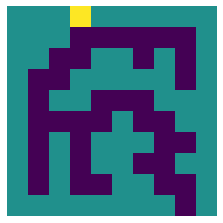

In [37]:
import copy

a =[[1,1,1,2,1,1,1,1,1,1],
    [1,1,1,0,0,0,0,0,0,1],
    [1,1,0,0,1,1,0,1,0,1],
    [1,0,0,1,1,1,1,1,0,1],  
    [1,0,1,1,0,0,0,1,1,1],    
    [1,0,0,0,0,1,0,0,1,1],  
    [1,0,1,0,1,1,1,0,0,1],
    [1,0,1,0,1,1,0,0,1,1],
    [1,0,1,0,0,1,1,0,0,1],
    [1,1,1,1,1,1,1,1,0,1]]



def convertir(matriz):
  obstaculos = []; inicial=(0,0); final = len(matriz)-1,len(matriz[0])-2
  for i in range(len(matriz)):
    for j in range(len(matriz[0])):
      if matriz[i][j] == 1:
        obstaculos.append((i,j))
      elif matriz[i][j] == 2:
        inicial=(i,j)
  return set(obstaculos),inicial,final


d1 = GridProblem(initial=convertir(a)[1],goal=convertir(a)[2],obstacles=convertir(a)[0])

path = path_states(breadth_first_search(d1))
path1 = path_states(depth_first_search(d1))
path2 = path_states(depth_limited_search(d1))

print(path == path1); print(path1 == path2)



#Graficar

def sin2(matriz):
  b = copy.deepcopy(matriz)
  for i in range(len(b)):
    for j in range(len(b[0])):
      if b[i][j]==2:
        b[i][j]=0
  return b

def con2(matriz,pos):
  c = copy.deepcopy(matriz)
  c[int(pos[0])][int(pos[1])] = 2
  return c

def estados(path, inicial):
  registro = []
  for i in path:
    c = sin2(inicial[:])
    d = con2(c[:], i)
    registro.append(d)
  return registro

ab = estados(path, a)

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

def update(i):
    im_normed = ab[i]
    ax.imshow(im_normed)
    ax.set_axis_off()

anim = FuncAnimation(fig, update, frames=len(ab), interval=50)

plt.show()


In [1]:
class CountCalls:
    """Delegate all attribute gets to the object, and count them in ._counts"""
    def __init__(self, obj):
        self._object = obj
        self._counts = Counter()
        
    def __getattr__(self, attr):
        "Delegate to the original object, after incrementing a counter."
        self._counts[attr] += 1
        return getattr(self._object, attr)

        
def report(searchers, problems, verbose=True):
    """Show summary statistics for each searcher (and on each problem unless verbose is false)."""
    for searcher in searchers:
        print(searcher.__name__ + ':')
        total_counts = Counter()
        for p in problems:
            prob   = CountCalls(p)
            soln   = searcher(prob)
            counts = prob._counts; 
            counts.update(actions=len(soln), cost=soln.path_cost)
            total_counts += counts
            if verbose: report_counts(counts, str(p)[:40])
        report_counts(total_counts, 'TOTAL\n')
        
def report_counts(counts, name):
    """Print one line of the counts report."""
    print('{:9,d} nodes |{:9,d} goal |{:5.0f} cost |{:8,d} actions | {}'.format(
          counts['result'], counts['is_goal'], counts['cost'], counts['actions'], name))

In [33]:
report([depth_first_search, breadth_first_search, depth_limited_search, uniform_cost_search, greedy_bfs, astar_search], [d1])



depth_first_search:
       60 nodes |       46 goal |   20 cost |      48 actions | GridProblem((0, 3), (9, 8))
       60 nodes |       46 goal |   20 cost |      48 actions | TOTAL

breadth_first_search:
    2,193 nodes |    2,194 goal |   20 cost |     595 actions | GridProblem((0, 3), (9, 8))
    2,193 nodes |    2,194 goal |   20 cost |     595 actions | TOTAL

depth_limited_search:
   15,226 nodes |   15,227 goal |  inf cost |   3,896 actions | GridProblem((0, 3), (9, 8))
   15,226 nodes |   15,227 goal |  inf cost |   3,896 actions | TOTAL

uniform_cost_search:
    2,297 nodes |      602 goal |   20 cost |     621 actions | GridProblem((0, 3), (9, 8))
    2,297 nodes |      602 goal |   20 cost |     621 actions | TOTAL

greedy_bfs:
       67 nodes |       33 goal |   20 cost |      52 actions | GridProblem((0, 3), (9, 8))
       67 nodes |       33 goal |   20 cost |      52 actions | TOTAL

astar_search:
      274 nodes |       93 goal |   20 cost |     112 actions | GridProble